# PTF Residuals

In [2]:
import chainladder as cl
import pandas as pd

This example replicates the diagnostic residuals from Barnett and Zehnwirth's
"Best Estimates for Reserves" paper in which they describe the Probabilistic
Trend Family (PTF) model.  With the "ABC" triangle, they show that the basic
chainladder, which ignores trend along the valuation axis, fails to have iid
weighted standardized residuals along the valuation of the Triangle.

We fit a "diagnostic" model that deliberately ignores modeling the valuation
vector.  This is done by specifying the patsy formula ``C(origin)+C(development)``
which fits origin and development as categorical features.


In [29]:
abc = cl.load_sample('abc')
model = cl.BarnettZehnwirth(formula='C(origin) + C(development)').fit(abc)

plot1a = model.std_residuals_.T
plot1b = plot1a.T.mean()

plot2a = model.std_residuals_
plot2b = plot2a.T.mean()

plot3a = model.std_residuals_.dev_to_val().T
plot3b = model.std_residuals_.dev_to_val().mean('origin').T

plot4 = pd.concat((
    model.triangle_ml_[model.triangle_ml_.valuation<=abc.valuation_date].log().unstack().rename('Fitted Values'),
    model.std_residuals_.unstack().rename('Residual')), axis=1).dropna()

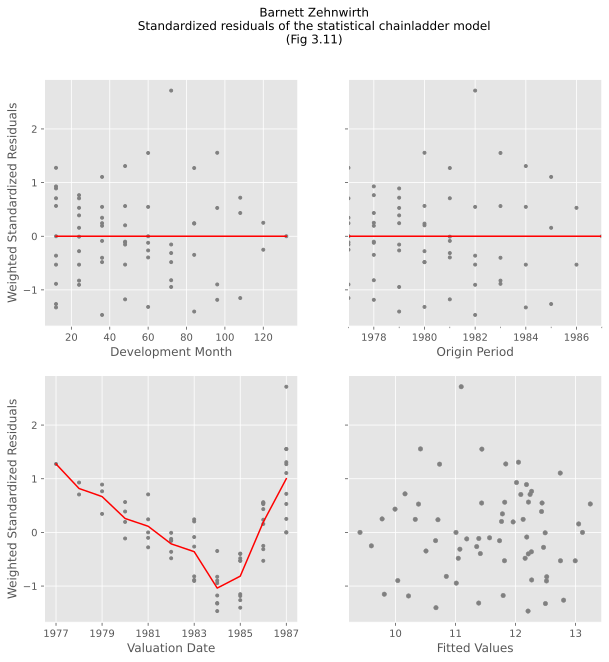

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(14,10))
fig.suptitle("Barnett Zehnwirth\nStandardized residuals of the statistical chainladder model\n(Fig 3.11)");

plot1a.plot(
    style='.', color='gray', legend=False, ax=ax00,
    xlabel='Development Month', ylabel='Weighted Standardized Residuals')
plot1b.plot(color='red', legend=False, ax=ax00)

plot2a.plot(style='.', color='gray', legend=False, ax=ax01, xlabel='Origin Period')
plot2b.plot(color='red', legend=False, ax=ax01)
plot3a.plot(
    style='.', color='gray', legend=False, ax=ax10,
    xlabel='Valuation Date', ylabel='Weighted Standardized Residuals')
plot3b.plot(color='red', legend=False, ax=ax10)

plot4.plot(kind='scatter', marker='o', color='gray', 
           x='Fitted Values', y='Residual', ax=ax11, sharey=True);


In [32]:
from myst_nb import glue
glue("plot_ptf_resid", fig, display=False)